# stock2_mplfinance
## 概要
* yahoo financeより株価データを取得する
* mplfinanceを用いてグラフ化する
  * ローソク足をグラフ化する
  * ローソク足、ボリンジャーバンド、出来高をグラフ化する
## 参考
### キノコード：株価のデータ分析(2)
* https://youtu.be/-x88kBpG0Bw
* https://kino-code.com/python_automation_stock_analysis2/
### install packages
* pip install mplfinance

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import mplfinance as mpf
import talib as ta
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
# 日経平均データ(^N225)の取得
ticker = '^N225'
start = '2019-07-01'
end = '2020-07-01'

yf.pdr_override()
df = pdr.get_data_yahoo(ticker, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
date=df.index
close=df['Adj Close']

span01=5
span02=25
span03=50

df["upper"], df["middle"], df["lower"] = ta.BBANDS(close, timeperiod=span02, nbdevup=2, nbdevdn=2, matype=0)

In [4]:
# ローソク足データの作成
df_candle = df[['High', 'Low', 'Open', 'Close', 'Volume']]

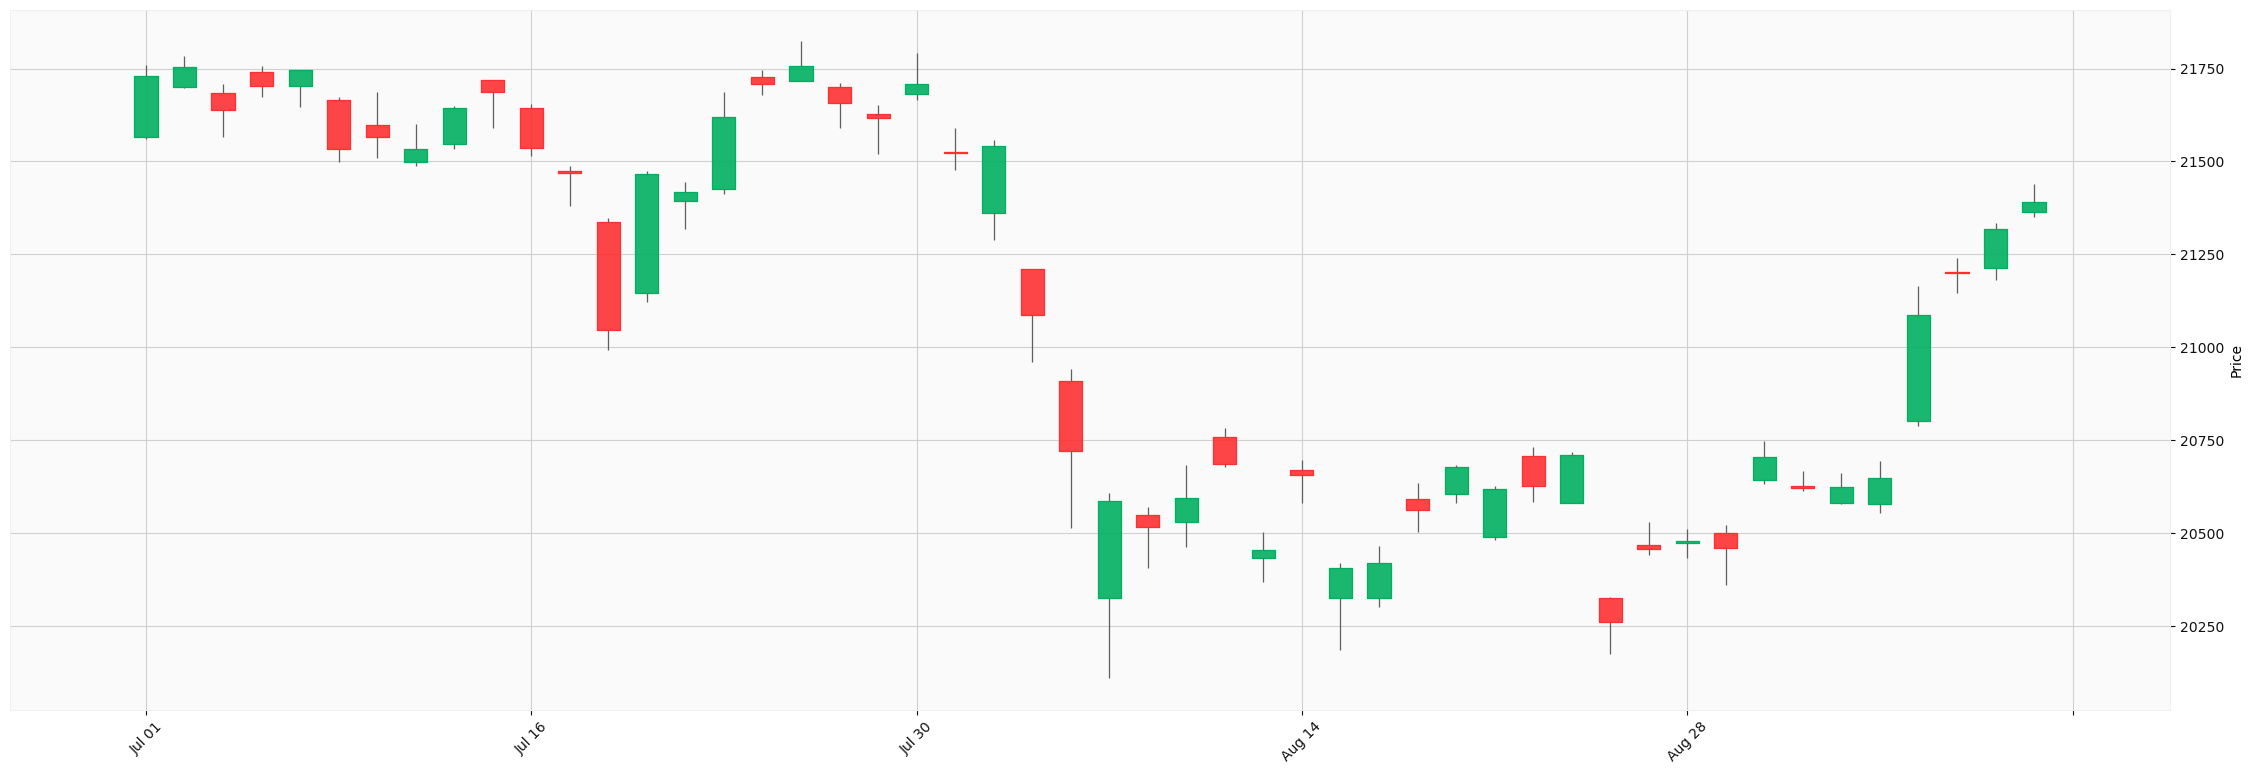

In [5]:
mpf.plot(df_candle[0:50], type='candle', style='yahoo', figsize=(30,10))

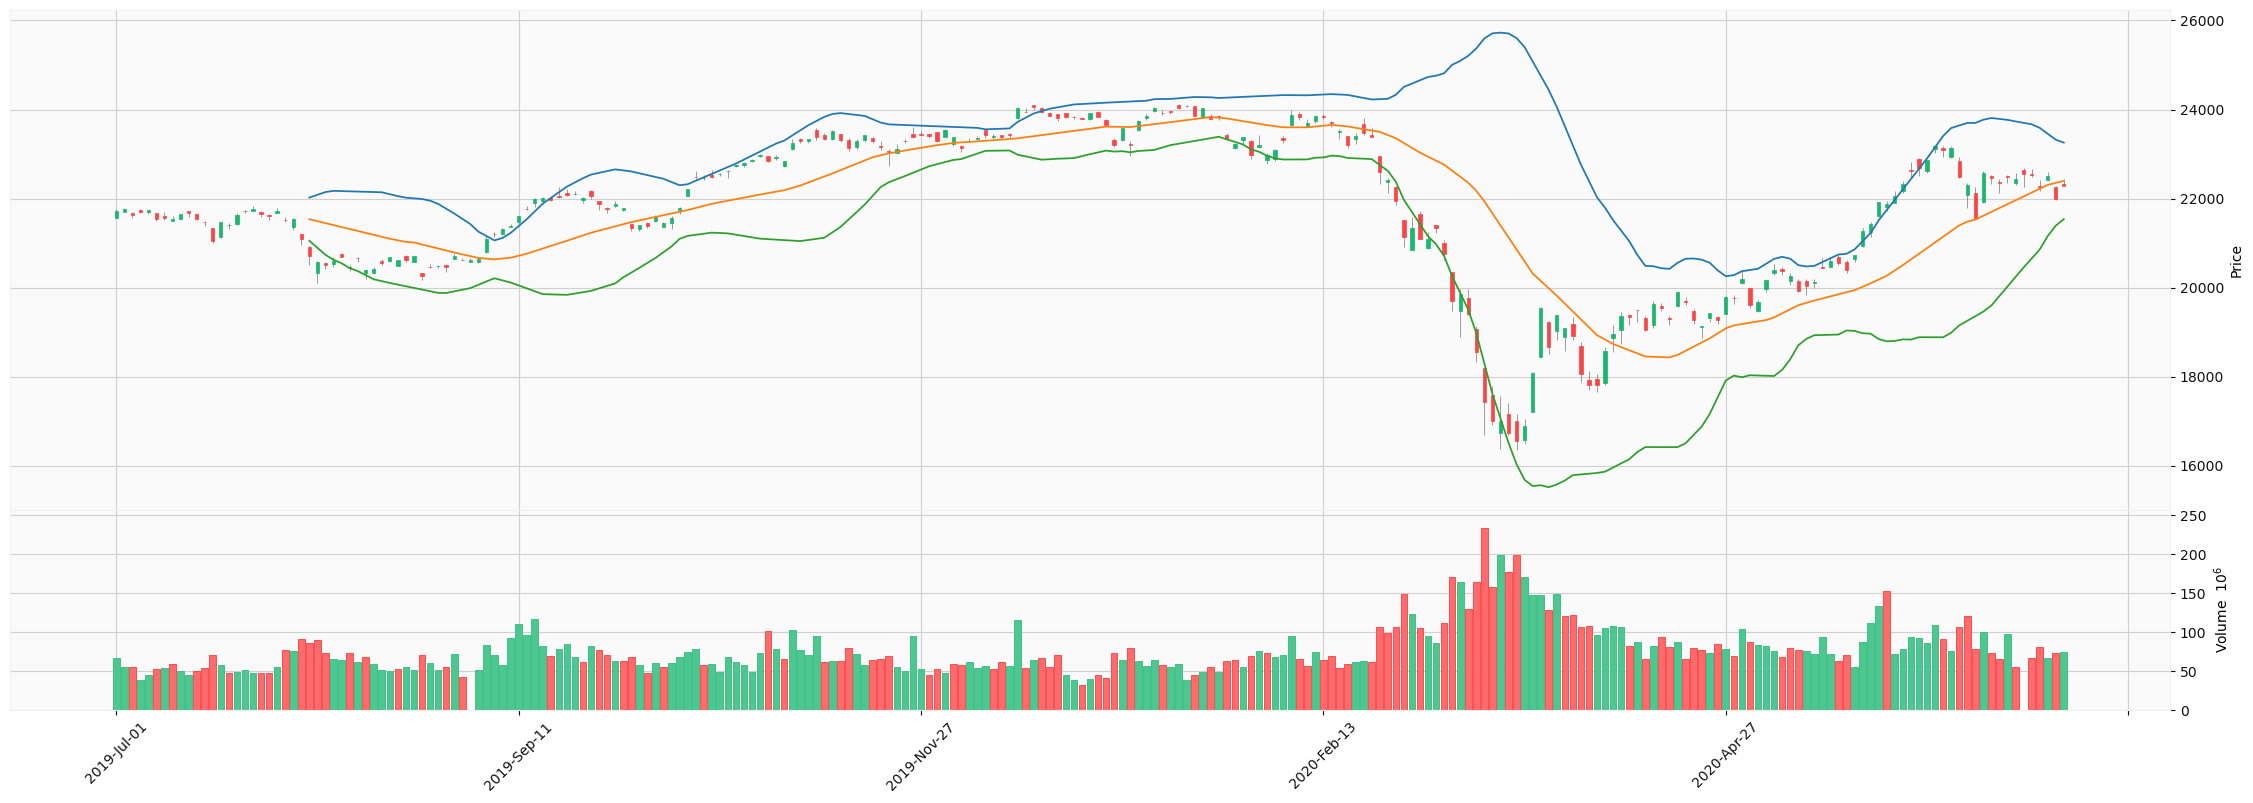

In [6]:
tcdf = df[['upper', 'middle', 'lower']]
apd = mpf.make_addplot(tcdf)
mpf.plot(df_candle, addplot=apd, type='candle', volume=True, style='yahoo', figsize=(30,10))